In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
from os.path import dirname, join
from pathlib import Path
ROOT_DIR = dirname(os.path.abspath('ARCH7211-SPRING2021')) # This is your Project Root
data_PATH = join(ROOT_DIR,"data","room_info.csv")  # requires `import os`

# input data
data = pd.read_csv(r'C:\Users\milad\Documents\GitHub\arch7211-spring2021\data\room_info.csv')

In [5]:
data.head()

,path,type,classes,floor_index,num_sides,area,proportion_floor_area,perimeter,compactness,num_adjacent_walls,...,contains_ShowerScreen,contains_Sink,contains_SpaceForAppliance,contains_Stove,contains_Toilet,contains_TumbleDryer,contains_Urinal,contains_WallCabinet,contains_WashingMachine,contains_WaterTap
0,/Users/Nicholas/Desktop/cubicasa5k/high_qualit...,Entry,Entry Lobby,0,8,56159.9318,0.058254,1166.86,0.518321,12,...,0,0,0,0,0,0,0,0,0,0
1,/Users/Nicholas/Desktop/cubicasa5k/high_qualit...,Utility,Utility Laundry,0,8,45361.5082,0.047053,1006.82,0.562333,8,...,0,0,0,0,0,0,0,1,0,0
2,/Users/Nicholas/Desktop/cubicasa5k/high_qualit...,Kitchen,Kitchen,0,6,73772.9501,0.076524,1139.34,0.714168,5,...,0,1,0,1,0,0,0,1,0,0
3,/Users/Nicholas/Desktop/cubicasa5k/high_qualit...,LivingRoom,LivingRoom,0,4,286664.8762,0.297355,2165.54,0.768160,4,...,0,0,0,0,0,0,0,0,0,0
4,/Users/Nicholas/Desktop/cubicasa5k/high_qualit...,Bedroom,Bedroom,0,6,96086.0375,0.099669,1262.44,0.757615,6,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61394 entries, 0 to 61393
Columns: 110 entries, path to contains_WaterTap
dtypes: float64(5), int64(99), object(6)
memory usage: 51.5+ MB


In [7]:
#Clean input data from the target data
# define features and predictions
X = data.drop(['path','type','classes','open_to','door_to','contains'], axis =1)
y = data['type']
#Split the data into training data, and test data 
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [8]:
#import random forest and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Instanciate randomforest classifier 
rfc = RandomForestClassifier(n_estimators= 400)

In [9]:
# train model 
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
# predict
rfc_pred = rfc.predict(X_test)

In [11]:
# Evaluate model
print( confusion_matrix(y_test,rfc_pred))
print('\n')
print( classification_report(y_test,rfc_pred))

[[  24    0    0    0    3    0    0    0    2    0    0    0    2    0
     0    0    0    0    0    0    1    0    0    0    0    0   13    1
     0]
 [   0    6    0    1    5    0    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    1    0    0    0   10    1
     0]
 [   0    0    2    0    0    0    3    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    6    0    3    1
     0]
 [   0    0    0 2035    4    0   16    0    0    1    4    0    1    0
     0    0    0    0    0    0    1    0    0    0    5    3   65    2
    10]
 [   0    0    0    0 2277    0    1    0    5    0    1    1    7    2
     0    4    0   25    1    0    6    0   17    0    7    0   30    0
     0]
 [   0    0    0    0    0   37    0    0    0    0    0    0    0    8
     0    0    0    1    0    0   22    0    0    0    0    0    2    0
     0]
 [   2    0    0    4   11    0  683    0    0    2    0    0    4    1
     0    0    0

In [12]:
# cMat = confusion_matrix(y_test,rfc_pred)
# print(len(y_test.unique()))
# df_cm = pd.DataFrame(data = cMat , index= pd.Series(y_test).unique() , columns= pd.Series(rfc_pred).unique())
# # df_cm = pd.DataFrame(data = cMat)
# df_cm.head()
# plt.figure(figsize= (50,50))
# sn.heatmap(df_cm, annot=True)

In [13]:
exclusion = ["Undefined","UserDefined","Other"]
merge = {
    "Sauna": "Bath",
    "Den":'LivingRoom',
    "Library": "Office",
    "DressingRoom":'Closet'
}

data["type_cleaned"] = data["type"].apply(lambda x: merge.get(x,x))
data["exclude"] = ~data["type"].isin(exclusion)

In [14]:
data.shape

(61394, 112)

In [15]:
data.groupby("type",as_index=False).count().sort_values("path")

,type,path,classes,floor_index,num_sides,area,proportion_floor_area,perimeter,compactness,num_adjacent_walls,...,contains_SpaceForAppliance,contains_Stove,contains_Toilet,contains_TumbleDryer,contains_Urinal,contains_WallCabinet,contains_WashingMachine,contains_WaterTap,type_cleaned,exclude
19,Other,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
16,Library,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
2,Basement,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
21,RecreationRoom,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
1,Attic,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
11,Elevated,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
23,Sauna,133,133,133,133,133,133,133,133,133,...,133,133,133,133,133,133,133,133,133,133
18,Office,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135
0,Alcove,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
14,Hall,172,172,172,172,172,172,172,172,172,...,172,172,172,172,172,172,172,172,172,172


In [16]:
data_exclude = data[~data["type"].isin(exclusion)]

In [17]:
data_exclude.groupby("type_cleaned",as_index=False).count().sort_values("type_cleaned")

,type_cleaned,path,type,classes,floor_index,num_sides,area,proportion_floor_area,perimeter,compactness,...,contains_Sink,contains_SpaceForAppliance,contains_Stove,contains_Toilet,contains_TumbleDryer,contains_Urinal,contains_WallCabinet,contains_WashingMachine,contains_WaterTap,exclude
0,Alcove,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
1,Attic,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
2,Basement,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
3,Bath,7288,7288,7288,7288,7288,7288,7288,7288,7288,...,7288,7288,7288,7288,7288,7288,7288,7288,7288,7288
4,Bedroom,7993,7993,7993,7993,7993,7993,7993,7993,7993,...,7993,7993,7993,7993,7993,7993,7993,7993,7993,7993
5,CarPort,279,279,279,279,279,279,279,279,279,...,279,279,279,279,279,279,279,279,279,279
6,Closet,3041,3041,3041,3041,3041,3041,3041,3041,3041,...,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041
7,Dining,954,954,954,954,954,954,954,954,954,...,954,954,954,954,954,954,954,954,954,954
8,DraughtLobby,1667,1667,1667,1667,1667,1667,1667,1667,1667,...,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667
9,Elevated,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [18]:
data_exclude.loc[0]

path                       /Users/Nicholas/Desktop/cubicasa5k/high_qualit...
type                                                                   Entry
classes                                                          Entry Lobby
floor_index                                                                0
num_sides                                                                  8
                                                 ...                        
contains_WallCabinet                                                       0
contains_WashingMachine                                                    0
contains_WaterTap                                                          0
type_cleaned                                                           Entry
exclude                                                                 True
Name: 0, Length: 112, dtype: object

In [28]:
#Clean input data from the target data
# define features and predictions
X = data_exclude.drop(['path','type','classes','open_to','door_to','contains','type_cleaned','exclude'], axis =1)
y = data_exclude['type']
#Split the data into training data, and test data 
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [29]:
#import random forest and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Instanciate randomforest classifier 
rfc = RandomForestClassifier(n_estimators= 400)

In [21]:
# train model 
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
# predict
rfc_pred = rfc.predict(X_test)

In [23]:
# Evaluate model
print( confusion_matrix(y_test,rfc_pred))
print('\n')
print( classification_report(y_test,rfc_pred))

[[  27    0    0    0    7    0    6    0    0    0    0    0    1    0
     0    0    0    0    0    2    0    0    0    0    0    0]
 [   0    9    0    0    8    0    2    0    0    0    0    0    1    0
     0    0    0    3    0    3    0    0    0    2    0    0]
 [   0    0    0    0    1    0    2    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0   12    0    0]
 [   0    0    0 2056    8    0   26    0    1    2    6    0    2    0
     0    0    0    0    0    2    0    0    1    5    4   12]
 [   3    0    0    1 2285    0    1    1    4    1    2    3   15    2
     0    4    0   31    0   10    0   11    0   14    0    0]
 [   0    0    0    0    0   41    0    0    0    0    0    0    0    8
     0    0    0    1    0   39    0    0    0    0    0    0]
 [   1    0    0   13   12    0  746    0    1    6    2    0    5    0
     0    0    0    0    0    3    0    0    1   17    0    0]
 [   0    0    0    0   15    0    1   41    6    0    

In [24]:
# sn.set()
# sn.barplot(y="type",x="area",data=data_exclude)

In [25]:
# sn.countplot(data_exclude["type_cleaned"])
# plt.xticks(rotation = 90)

In [92]:
#Grid Search
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, recall_score

from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50,100, 150,200,250,300,350,400,450,500,550,600,650,700,750,800]}   #,150,200,250,300,350,400,450,500,550,600,650,700,750,800
# scoring = {
    # 'Percision': make_scorer(average_precision_score),
    # 'f1': make_scorer(f1_score),
    # 'Accuracy': make_scorer(accuracy_score),
    # 'Recall': make_scorer(recall_score) }
rfc_grid = RandomForestClassifier()
grid_search = GridSearchCV(rfc_grid, param_grid, cv=5 , scoring='f1_macro' , return_train_score=True, refit='f1')
grid_search.fit(X_train, y_train)
cv_res = grid_search.cv_results_

In [90]:
# print (cv_res.keys())
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print ('f1_macro Score:',mean_score, params)

f1_macro Score: 0.5984830122275254 {'n_estimators': 50}
f1_macro Score: 0.5967965683841441 {'n_estimators': 100}


In [93]:
#import random forest and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Instanciate randomforest classifier 
rfc = RandomForestClassifier(n_estimators= 400)
# train model 
rfc.fit(X_train,y_train)
# predict
rfc_pred = rfc.predict(X_test)
# Evaluate model
# print( confusion_matrix(y_test,rfc_pred))
print('\n')
print( classification_report(y_test,rfc_pred))



                precision    recall  f1-score   support

        Alcove       0.79      0.61      0.69        51
         Attic       0.86      0.27      0.41        22
      Basement       1.00      0.12      0.21        17
          Bath       0.96      0.97      0.97      2153
       Bedroom       0.81      0.96      0.87      2339
       CarPort       0.71      0.45      0.55        71
        Closet       0.88      0.95      0.92       804
           Den       0.76      0.36      0.48       104
        Dining       0.83      0.86      0.84       281
  DraughtLobby       0.92      0.93      0.93       491
  DressingRoom       0.74      0.41      0.53        94
      Elevated       1.00      0.03      0.06        32
         Entry       0.88      0.95      0.92      1296
        Garage       0.75      0.74      0.75       136
          Hall       1.00      0.04      0.07        54
       Kitchen       0.97      0.95      0.96      1373
       Library       0.00      0.00      0.00

In [95]:
#import random forest and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Instanciate randomforest classifier 
rfc = RandomForestClassifier(n_estimators= 400 , max_depth= 25)
# train model 
rfc.fit(X_train,y_train)
# predict
rfc_pred = rfc.predict(X_test)
# Evaluate model
# print( confusion_matrix(y_test,rfc_pred))
print('\n')
print( classification_report(y_test,rfc_pred))



                precision    recall  f1-score   support

        Alcove       0.77      0.59      0.67        51
         Attic       0.80      0.18      0.30        22
      Basement       0.00      0.00      0.00        17
          Bath       0.96      0.97      0.97      2153
       Bedroom       0.80      0.96      0.87      2339
       CarPort       0.73      0.46      0.57        71
        Closet       0.88      0.95      0.91       804
           Den       0.76      0.39      0.52       104
        Dining       0.82      0.85      0.84       281
  DraughtLobby       0.93      0.93      0.93       491
  DressingRoom       0.75      0.40      0.52        94
      Elevated       1.00      0.03      0.06        32
         Entry       0.88      0.95      0.92      1296
        Garage       0.76      0.76      0.76       136
          Hall       1.00      0.04      0.07        54
       Kitchen       0.97      0.95      0.96      1373
       Library       0.00      0.00      0.00

In [151]:
f_import = list(zip(data_exclude,rfc.feature_importances_))
for name,score in sorted(f_import, key = lambda x: x[1], reverse = True):
    print(name,score)

classes 0.071033446781688
num_sides 0.06116224678422417
proportion_floor_area 0.05771903637085148
floor_index 0.05144065347081752
perimeter 0.04984623359508884
contains_SaunaBench 0.0412842214074528
num_adjacent_railings 0.03932456125548559
num_adjacent_rooms 0.03873405797149899
num_connected_rooms 0.036230537853020994
num_adjacent_walls 0.03539707324406932
contains_Shower 0.03498372404525692
area 0.03432519297425803
open_to_Undefined 0.033887199619345276
contains_ShowerCab 0.032328869517769046
proportion_exterior_walls 0.026803432764831606
compactness 0.025700545046739614
door_to_UserDefined 0.02537883621195214
contains_Housing 0.022754236897625242
contains_Fireplace 0.02204452593590321
door_to_Alcove 0.020465468793948175
door_to_LivingRoom 0.019065312763162347
open_to_Utility 0.017656200071591868
open_to_Entry 0.01756857725317197
open_to_Hall 0.016891134204093907
type 0.016309303398050985
open_to_DraughtLobby 0.015907518554685522
door_to_Attic 0.01450025565381537
door_to_DraughtLobby

In [153]:
import seaborn as sn

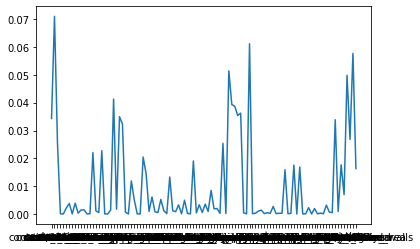

In [164]:
sn.lineplot((x[0] for x in f_import) , (x[1] for x in f_import) )